# Modeling earthquake damage

Rupesh Shrestha (L20528028)

The dataset mainly consists of information on the buildings' structure and their legal ownership. Each row in the dataset represents a specific building in the region that was hit by Gorkha earthquake.

There are 39 columns in this dataset, where the building_id column is a unique and random identifier. The remaining 38 features are described in the section below. Categorical variables have been obfuscated random lowercase ascii characters. The appearance of the same character in distinct columns does not imply the same original value.

In [1]:
#importing liabraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
train_values = pd.read_csv('train_values.csv')
train_labels = pd.read_csv('train_labels.csv')
test_values = pd.read_csv('test_values.csv')

In [3]:
print(f'Train shape: {train_values.shape}')
print(f'Test shape: {test_values.shape}')

Train shape: (260601, 39)
Test shape: (86868, 39)


In [4]:
#display to 5 rows
train_values.head()



,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,802906,6,487,12198,2,30,6,5,t,r,...,0,0,0,0,0,0,0,0,0,0
1,28830,8,900,2812,2,10,8,7,o,r,...,0,0,0,0,0,0,0,0,0,0
2,94947,21,363,8973,2,10,5,5,t,r,...,0,0,0,0,0,0,0,0,0,0
3,590882,22,418,10694,2,10,6,5,t,r,...,0,0,0,0,0,0,0,0,0,0
4,201944,11,131,1488,3,30,8,9,t,r,...,0,0,0,0,0,0,0,0,0,0


In [5]:
train_values.head(10)

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,802906,6,487,12198,2,30,6,5,t,r,...,0,0,0,0,0,0,0,0,0,0
1,28830,8,900,2812,2,10,8,7,o,r,...,0,0,0,0,0,0,0,0,0,0
2,94947,21,363,8973,2,10,5,5,t,r,...,0,0,0,0,0,0,0,0,0,0
3,590882,22,418,10694,2,10,6,5,t,r,...,0,0,0,0,0,0,0,0,0,0
4,201944,11,131,1488,3,30,8,9,t,r,...,0,0,0,0,0,0,0,0,0,0
5,333020,8,558,6089,2,10,9,5,t,r,...,1,0,0,0,0,0,0,0,0,0
6,728451,9,475,12066,2,25,3,4,n,r,...,0,0,0,0,0,0,0,0,0,0
7,475515,20,323,12236,2,0,8,6,t,w,...,0,0,0,0,0,0,0,0,0,0
8,441126,0,757,7219,2,15,8,6,t,r,...,0,0,0,0,0,0,0,0,0,0
9,989500,26,886,994,1,0,13,4,t,i,...,0,0,0,0,0,0,0,0,0,0


In [6]:
train_values.describe()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
count,2.606010e+05,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,...,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000
mean,5.256755e+05,13.900353,701.074685,6257.876148,2.129723,26.535029,8.018051,5.434365,0.088645,0.761935,...,0.064378,0.033626,0.008101,0.000940,0.000361,0.001071,0.000188,0.000146,0.000088,0.005119
std,3.045450e+05,8.033617,412.710734,3646.369645,0.727665,73.565937,4.392231,1.918418,0.284231,0.425900,...,0.245426,0.180265,0.089638,0.030647,0.018989,0.032703,0.013711,0.012075,0.009394,0.071364
min,4.000000e+00,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.611900e+05,7.000000,350.000000,3073.000000,2.000000,10.000000,5.000000,4.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5.257570e+05,12.000000,702.000000,6270.000000,2.000000,15.000000,7.000000,5.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,7.897620e+05,21.000000,1050.000000,9412.000000,2.000000,30.000000,9.000000,6.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.052934e+06,30.000000,1427.000000,12567.000000,9.000000,995.000000,100.000000,32.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
train_values.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260601 entries, 0 to 260600
Data columns (total 39 columns):
 #   Column                                  Non-Null Count   Dtype 
---  ------                                  --------------   ----- 
 0   building_id                             260601 non-null  int64 
 1   geo_level_1_id                          260601 non-null  int64 
 2   geo_level_2_id                          260601 non-null  int64 
 3   geo_level_3_id                          260601 non-null  int64 
 4   count_floors_pre_eq                     260601 non-null  int64 
 5   age                                     260601 non-null  int64 
 6   area_percentage                         260601 non-null  int64 
 7   height_percentage                       260601 non-null  int64 
 8   land_surface_condition                  260601 non-null  object
 9   foundation_type                         260601 non-null  object
 10  roof_type                               260601 non-null 

In [8]:
train_values.describe().T

,count,mean,std,min,25%,50%,75%,max
building_id,260601.0,525675.482773,304544.999032,4.0,261190.0,525757.0,789762.0,1052934.0
geo_level_1_id,260601.0,13.900353,8.033617,0.0,7.0,12.0,21.0,30.0
geo_level_2_id,260601.0,701.074685,412.710734,0.0,350.0,702.0,1050.0,1427.0
geo_level_3_id,260601.0,6257.876148,3646.369645,0.0,3073.0,6270.0,9412.0,12567.0
count_floors_pre_eq,260601.0,2.129723,0.727665,1.0,2.0,2.0,2.0,9.0
age,260601.0,26.535029,73.565937,0.0,10.0,15.0,30.0,995.0
area_percentage,260601.0,8.018051,4.392231,1.0,5.0,7.0,9.0,100.0
height_percentage,260601.0,5.434365,1.918418,2.0,4.0,5.0,6.0,32.0
has_superstructure_adobe_mud,260601.0,0.088645,0.284231,0.0,0.0,0.0,0.0,1.0
has_superstructure_mud_mortar_stone,260601.0,0.761935,0.425900,0.0,1.0,1.0,1.0,1.0


##Missing values

##Data is clean without missing values

In [9]:
#Merge the lable/target column with features
train=pd.merge(train_values,train_labels,on='building_id')

Text(0.5, 1.0, 'Damage Amount')

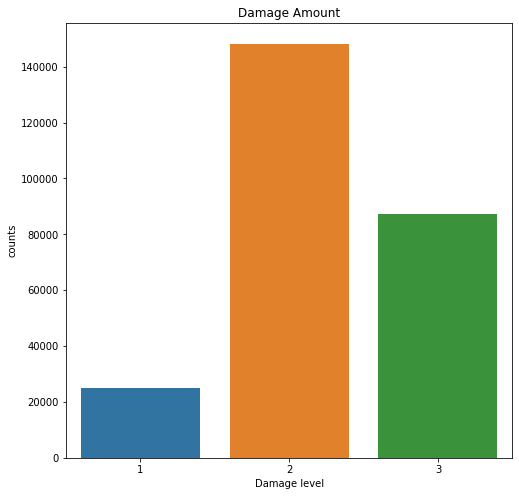

In [10]:
plt.figure(figsize=(8,8))

sns.countplot(train_labels['damage_grade'])
plt.xlabel('Damage level'); plt.ylabel('counts'); 
plt.title('Damage Amount')

#damage level indicated as value 1, 2, & 3.

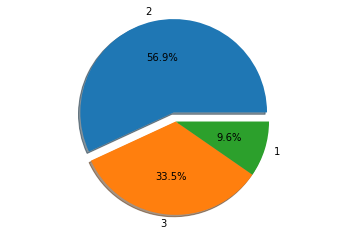

In [11]:
percent = list(train['damage_grade'].value_counts()/len(train['damage_grade'])*100)
label = list(train['damage_grade'].value_counts().index)
explode = (0.1,0,0)
fig,ax1 = plt.subplots()
ax1.pie(percent, explode=explode, labels=label, autopct='%1.1f%%', shadow=True)
ax1.axis('equal')
plt.show()

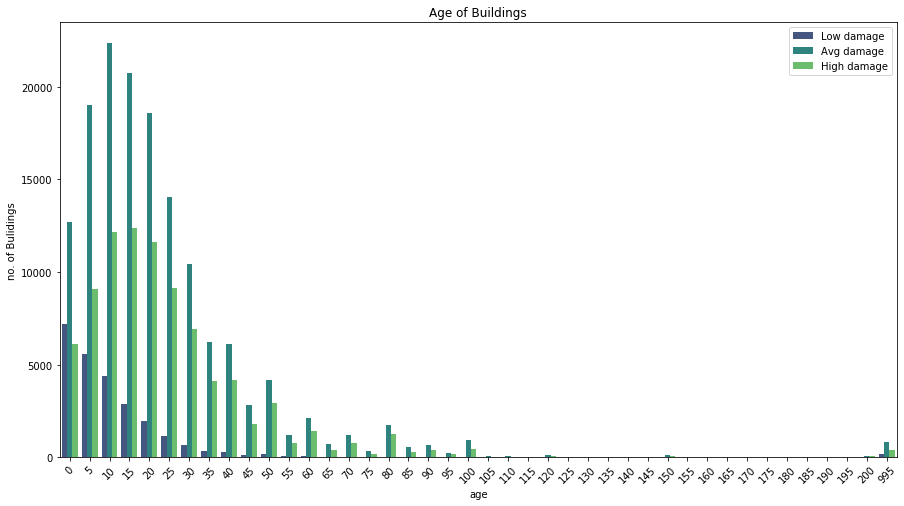

In [12]:
plt.figure(figsize=(15,8))
sns.countplot(x=train["age"],hue=train["damage_grade"],palette="viridis")
plt.ylabel("no. of Bulidings")
plt.title("Age of Buildings")
plt.legend(["Low damage","Avg damage","High damage"],loc="upper right")
plt.xticks(rotation=45)
plt.show()

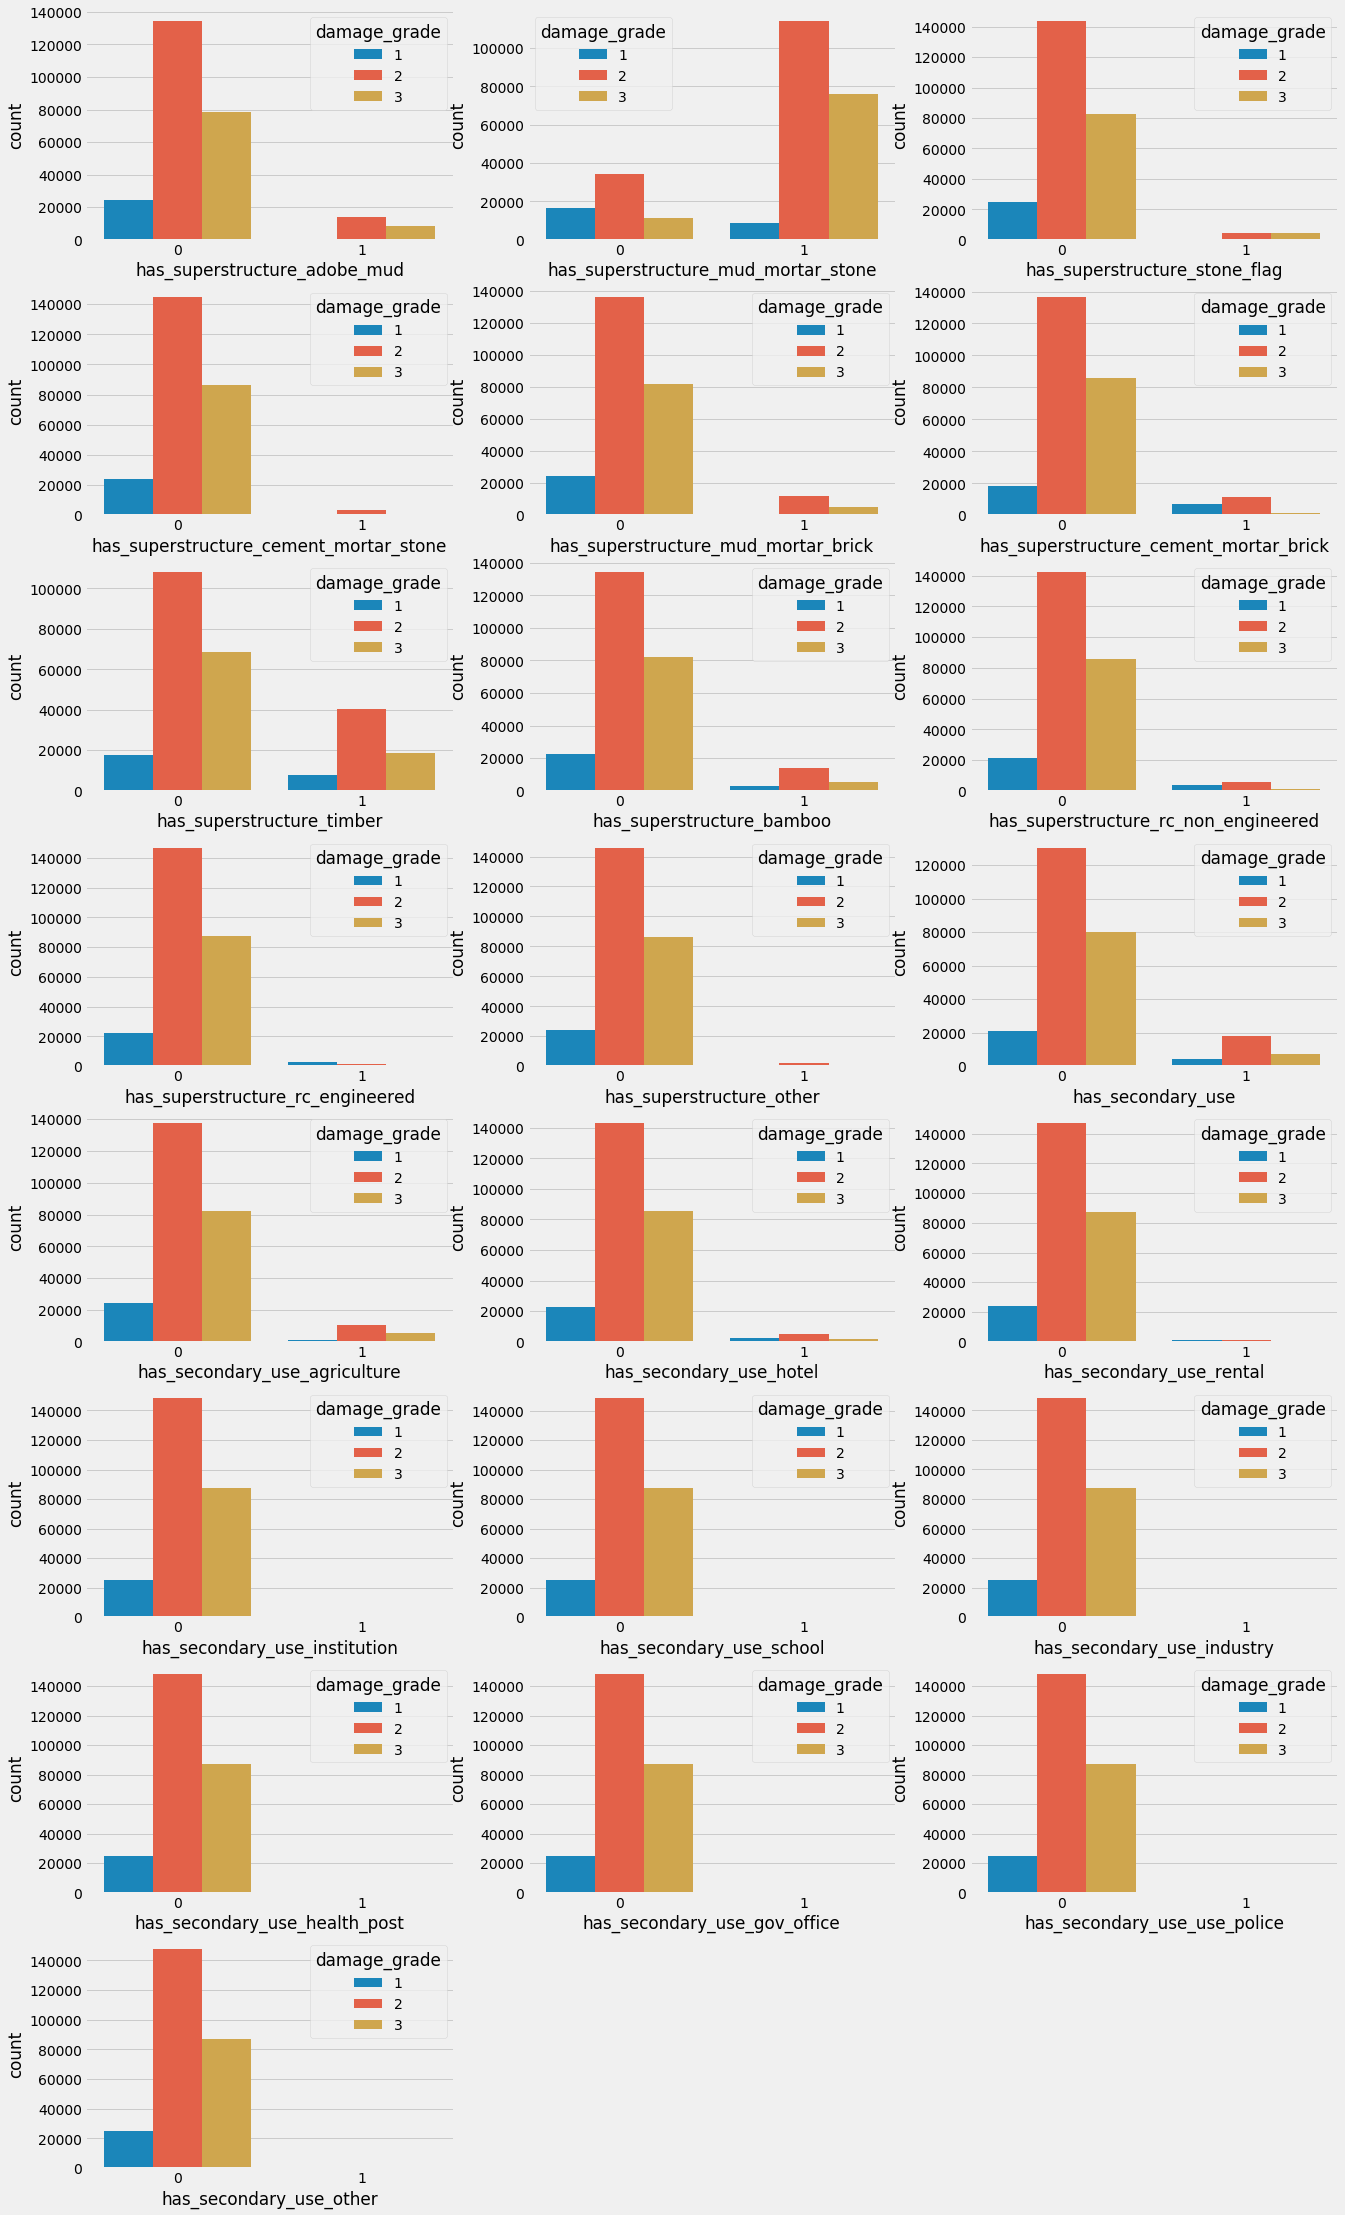

In [13]:
#Binary columns are selected using the column name having word 'has'
bin_cols = train.columns[train.columns.str.startswith('has')]

def countPlot(bin_cols):
  plt.rcParams['font.size'] = 18
  plt.style.use('fivethirtyeight')
  fig = plt.figure(figsize=(20,37))
  for i,txt in enumerate(bin_cols):
    ax = fig.add_subplot(8,3,i+1)
    sns.countplot(x=train[txt], ax=ax, hue=train['damage_grade'])
  plt.show()
countPlot(bin_cols)

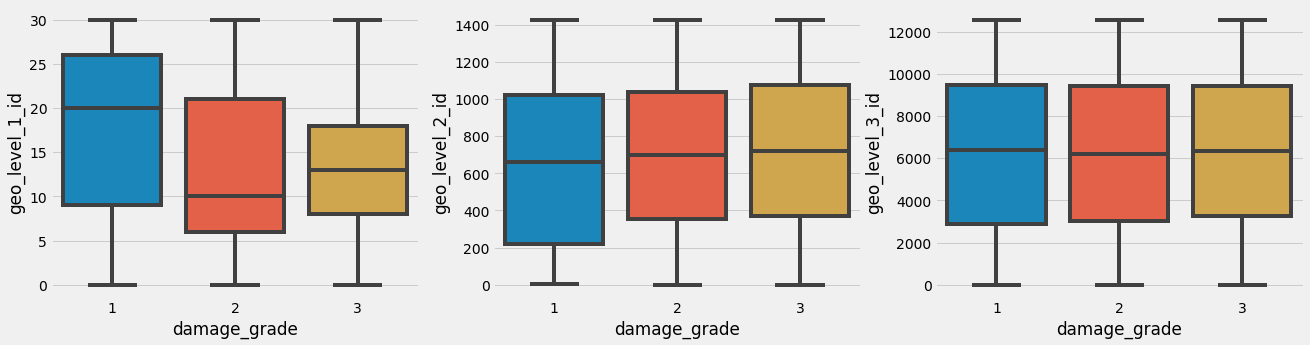

In [14]:
fig, axes = plt.subplots(ncols = 3, figsize = (20, 5))

sns.boxplot(y= train_values['geo_level_1_id'], x= train_labels['damage_grade'], ax = axes[0])
sns.boxplot(y= train_values['geo_level_2_id'], x= train_labels['damage_grade'], ax = axes[1])
sns.boxplot(y= train_values['geo_level_3_id'], x= train_labels['damage_grade'], ax = axes[2])

In [15]:
#object variables 

print(f"Land Surface Condition Catagories : {train_values['land_surface_condition'].unique()}")
print(f"Foundation Type Catagories : {train_values['foundation_type'].unique()}")
print(f"Roof Type Catagories : {train_values['roof_type'].unique()}")
print(f"Ground Floor Types Catagories : {train_values['ground_floor_type'].unique()}")
print(f"Other Floor Type Catagories : {train_values['other_floor_type'].unique()}")
print(f"Positions Catagories : {train_values['position'].unique()}")
print(f"Plan Coniguration Catagories : {train_values['plan_configuration'].unique()}")
print(f"Legal Ownership Catagories : {train_values['legal_ownership_status'].unique()}")

Land Surface Condition Catagories : ['t' 'o' 'n']
Foundation Type Catagories : ['r' 'w' 'i' 'u' 'h']
Roof Type Catagories : ['n' 'q' 'x']
Ground Floor Types Catagories : ['f' 'x' 'v' 'z' 'm']
Other Floor Type Catagories : ['q' 'x' 'j' 's']
Positions Catagories : ['t' 's' 'j' 'o']
Plan Coniguration Catagories : ['d' 'u' 's' 'q' 'm' 'c' 'a' 'n' 'f' 'o']
Legal Ownership Catagories : ['v' 'a' 'r' 'w']


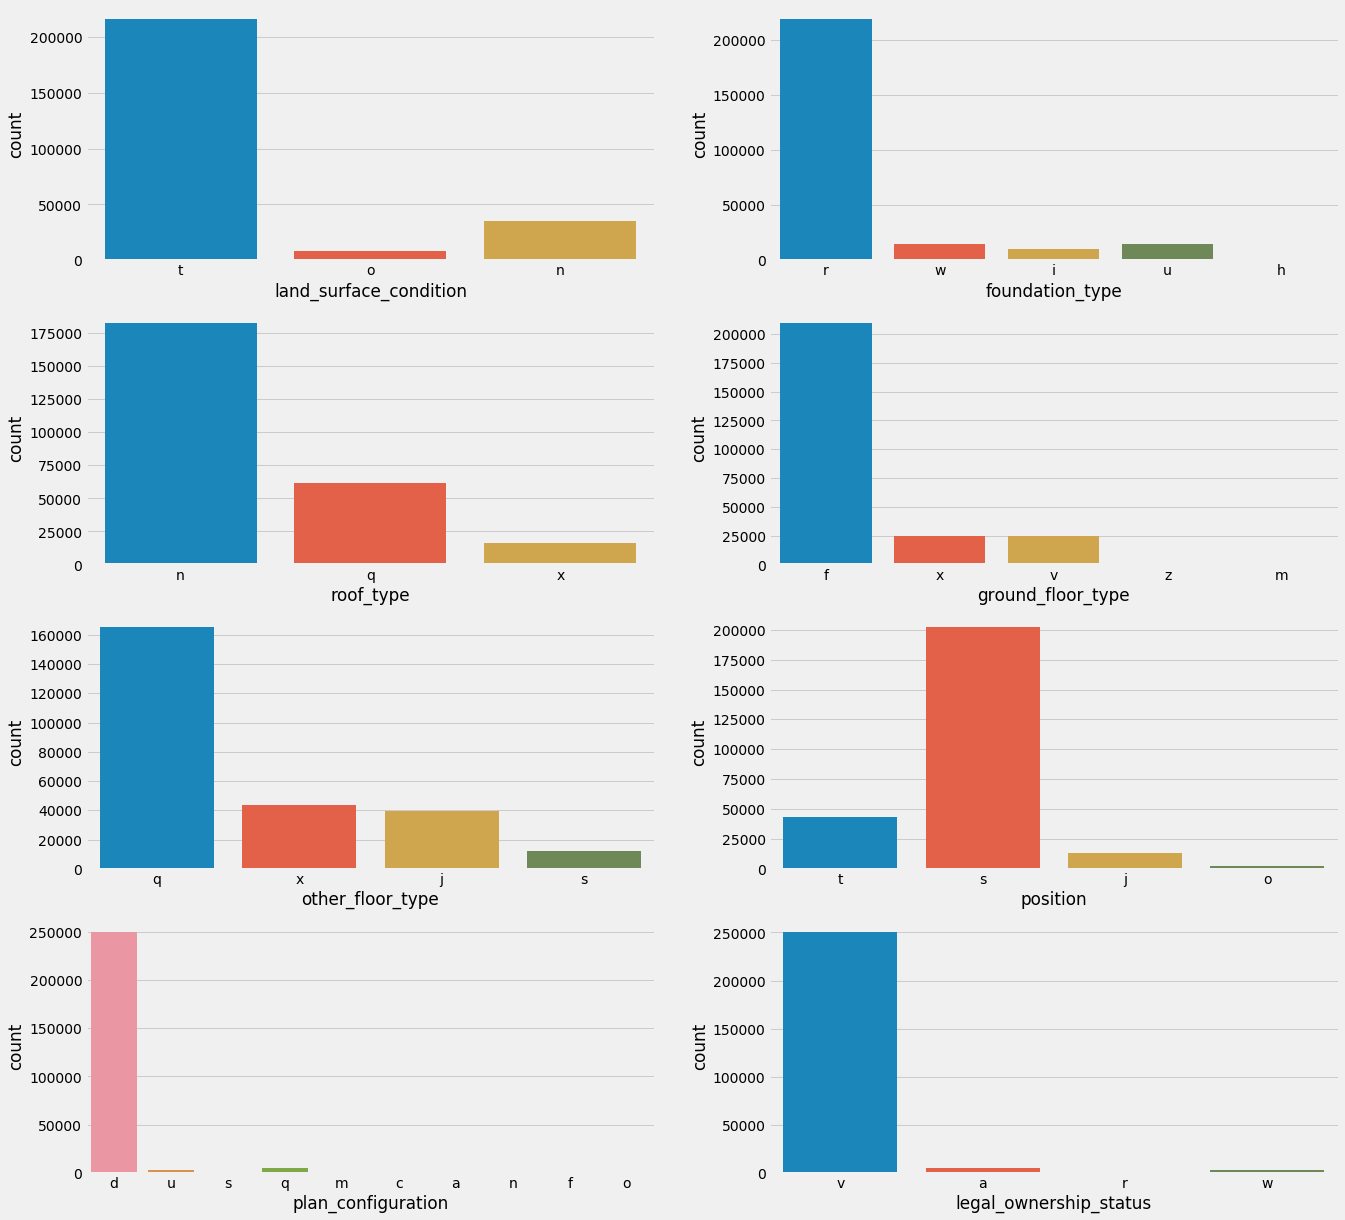

In [16]:
fig, axes = plt.subplots(ncols = 2, nrows = 4, figsize = (20, 20))
sns.countplot(train_values['land_surface_condition'], ax = axes[0][0])
sns.countplot(train_values['foundation_type'], ax = axes[0][1])
sns.countplot(train_values['roof_type'], ax = axes[1][0])
sns.countplot(train_values['ground_floor_type'], ax = axes[1][1])
sns.countplot(train_values['other_floor_type'], ax = axes[2][0])
sns.countplot(train_values['position'], ax = axes[2][1])
sns.countplot(train_values['plan_configuration'], ax = axes[3][0])
sns.countplot(train_values['legal_ownership_status'], ax = axes[3][1])

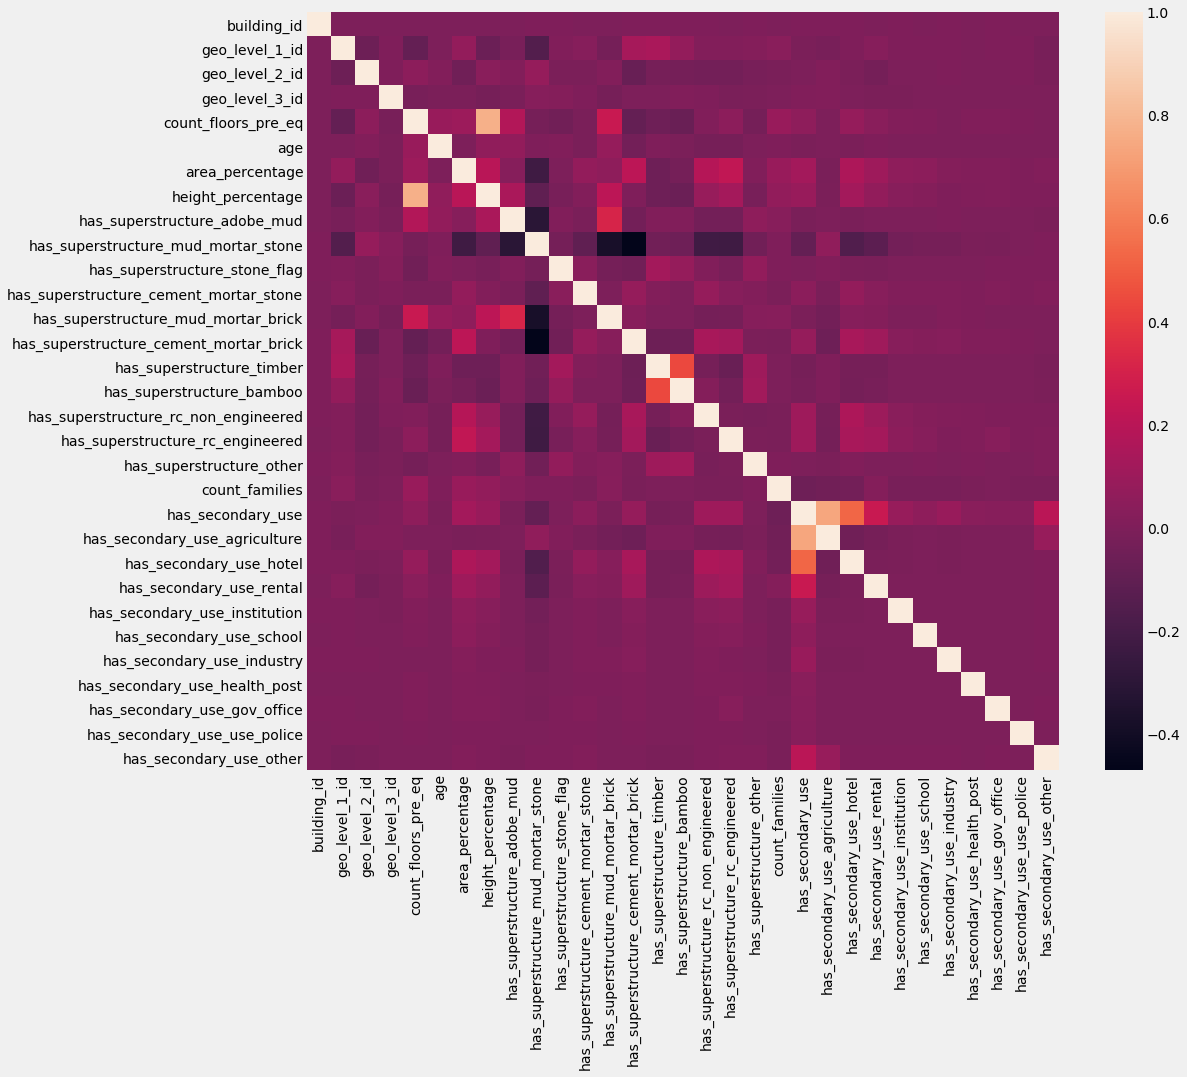

In [17]:
plt.figure(figsize=(15,13))
data_corr = train_values.corr()
sns.heatmap(data_corr)
plt.show();

<Figure size 720x360 with 0 Axes>

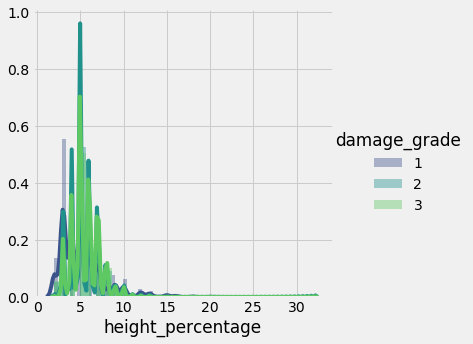

In [18]:
#Does the height of buliding affect on damage caused due to earthquake ?

plt.figure(figsize=(10,5))
sns.FacetGrid(train,hue='damage_grade',height=5,palette="viridis")\
    .map(sns.distplot,'height_percentage')\
    .add_legend()
plt.show()

In [19]:
#object variables 

print(f"Land Surface Condition Catagories : {train_values['land_surface_condition'].unique()}")
print(f"Foundation Type Catagories : {train_values['foundation_type'].unique()}")
print(f"Roof Type Catagories : {train_values['roof_type'].unique()}")
print(f"Ground Floor Types Catagories : {train_values['ground_floor_type'].unique()}")
print(f"Other Floor Type Catagories : {train_values['other_floor_type'].unique()}")
print(f"Positions Catagories : {train_values['position'].unique()}")
print(f"Plan Coniguration Catagories : {train_values['plan_configuration'].unique()}")
print(f"Legal Ownership Catagories : {train_values['legal_ownership_status'].unique()}")

Land Surface Condition Catagories : ['t' 'o' 'n']
Foundation Type Catagories : ['r' 'w' 'i' 'u' 'h']
Roof Type Catagories : ['n' 'q' 'x']
Ground Floor Types Catagories : ['f' 'x' 'v' 'z' 'm']
Other Floor Type Catagories : ['q' 'x' 'j' 's']
Positions Catagories : ['t' 's' 'j' 'o']
Plan Coniguration Catagories : ['d' 'u' 's' 'q' 'm' 'c' 'a' 'n' 'f' 'o']
Legal Ownership Catagories : ['v' 'a' 'r' 'w']


CHANGING INTO INTEGER

In [20]:
train_values["land_surface_condition"].replace ({
    't': 0,
    'o' : 1,
    'n' : 2
    
}, inplace=True)

In [21]:
train_values["foundation_type"].replace ({
    'r': 0,
    'w' : 1,
    'i' : 2,
     'u': 3,
    'h' : 4
        
}, inplace=True)

In [22]:
train_values["legal_ownership_status"].replace ({
    'v': 0,
    'a' : 1,
    'r' : 2,
    'w' : 3
}, inplace=True)

In [23]:
train_values["ground_floor_type"].replace ({
    'f': 0,
    'x' : 1,
    'v' : 2,
     'z': 3,
    'm' : 4
        
}, inplace=True)

In [24]:
train_values["roof_type"].replace ({
    'n': 0,
    'q' : 1,
    'x' : 2
    
}, inplace=True)

In [25]:
train_values["plan_configuration"].replace ({
    'd': 0,
    'u' : 1,
    's' : 2,
     'q': 3,
    'm' : 4,
    'c': 5,
    'a' : 6,
    'n' : 7,
     'f': 8,
    'o' : 9
        
}, inplace=True)

In [26]:
train_values["position"].replace ({
    't': 0,
    's' : 1,
    'j' : 2,
     'o': 3
   
        
}, inplace=True)


In [27]:
train_values.dtypes

building_id                                int64
geo_level_1_id                             int64
geo_level_2_id                             int64
geo_level_3_id                             int64
count_floors_pre_eq                        int64
age                                        int64
area_percentage                            int64
height_percentage                          int64
land_surface_condition                     int64
foundation_type                            int64
roof_type                                  int64
ground_floor_type                          int64
other_floor_type                          object
position                                   int64
plan_configuration                         int64
has_superstructure_adobe_mud               int64
has_superstructure_mud_mortar_stone        int64
has_superstructure_stone_flag              int64
has_superstructure_cement_mortar_stone     int64
has_superstructure_mud_mortar_brick        int64
has_superstructure_c

In [28]:
train_values["other_floor_type"].replace ({
    'q': 0,
    'x' : 1,
    'j' : 2,
     's': 3

        
}, inplace=True)

In [29]:
train_values.dtypes

building_id                               int64
geo_level_1_id                            int64
geo_level_2_id                            int64
geo_level_3_id                            int64
count_floors_pre_eq                       int64
age                                       int64
area_percentage                           int64
height_percentage                         int64
land_surface_condition                    int64
foundation_type                           int64
roof_type                                 int64
ground_floor_type                         int64
other_floor_type                          int64
position                                  int64
plan_configuration                        int64
has_superstructure_adobe_mud              int64
has_superstructure_mud_mortar_stone       int64
has_superstructure_stone_flag             int64
has_superstructure_cement_mortar_stone    int64
has_superstructure_mud_mortar_brick       int64
has_superstructure_cement_mortar_brick  

In [30]:
train_values

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,802906,6,487,12198,2,30,6,5,0,0,...,0,0,0,0,0,0,0,0,0,0
1,28830,8,900,2812,2,10,8,7,1,0,...,0,0,0,0,0,0,0,0,0,0
2,94947,21,363,8973,2,10,5,5,0,0,...,0,0,0,0,0,0,0,0,0,0
3,590882,22,418,10694,2,10,6,5,0,0,...,0,0,0,0,0,0,0,0,0,0
4,201944,11,131,1488,3,30,8,9,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260596,688636,25,1335,1621,1,55,6,3,2,0,...,0,0,0,0,0,0,0,0,0,0
260597,669485,17,715,2060,2,0,6,5,0,0,...,0,0,0,0,0,0,0,0,0,0
260598,602512,17,51,8163,3,55,6,7,0,0,...,0,0,0,0,0,0,0,0,0,0
260599,151409,26,39,1851,2,10,14,6,0,0,...,0,0,0,0,0,0,0,0,0,0


In [32]:
x_data = train_values [['geo_level_1_id','age','area_percentage','height_percentage']]

In [33]:
x_data.head()

,geo_level_1_id,age,area_percentage,height_percentage
0,6,30,6,5
1,8,10,8,7
2,21,10,5,5
3,22,10,6,5
4,11,30,8,9


Applying Normalization 


In [34]:
x_data = x_data.apply(lambda x: (x - x.min(axis=0)) / (x.max(axis=0) - x.min(axis=0)))

In [35]:
x_data.head()

,geo_level_1_id,age,area_percentage,height_percentage
0,0.200000,0.030151,0.050505,0.100000
1,0.266667,0.010050,0.070707,0.166667
2,0.700000,0.010050,0.040404,0.100000
3,0.733333,0.010050,0.050505,0.100000
4,0.366667,0.030151,0.070707,0.233333


In [36]:
# Using k=2 for number of cluster
model = KMeans(n_clusters=2)
model.fit(x_data)

NameError: name 'KMeans' is not defined

In [37]:
# Loading Clustering model
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN

In [38]:
# Using k=2 for number of cluster
model = KMeans(n_clusters=2)
model.fit(x_data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [39]:
#Check centroids of model
centroids = model.cluster_centers_
print(centroids)

[[0.24706072 0.02765891 0.06834249 0.11703777]
 [0.72908386 0.02545133 0.07401867 0.11133479]]


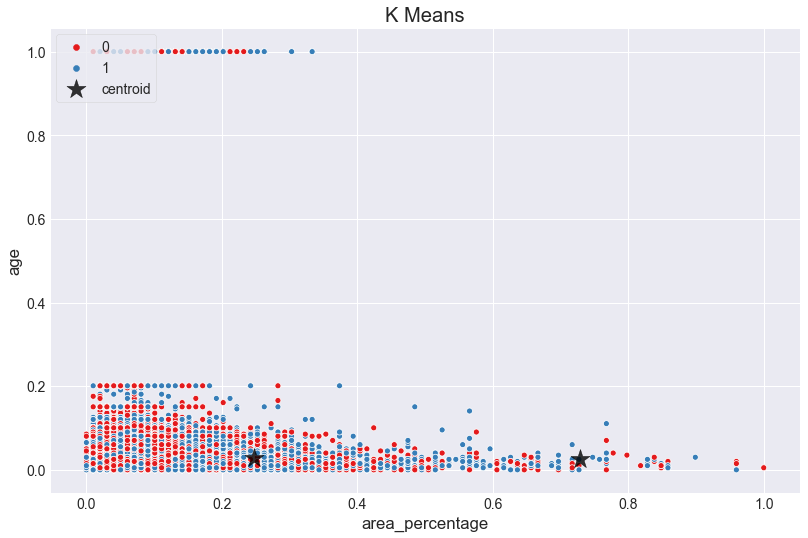

In [41]:
#Scatter plot between any two attibute kmean =2
sns.set_style('darkgrid')
plt.figure(figsize=(12,8))
plt.title('K Means')
sns.scatterplot(x='area_percentage',y='age',data=x_data,hue=model.labels_,palette='Set1')
#Define the centers of the clusters    
centers = model.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=400, alpha=0.8,marker='*',label='centroid')
plt.legend(loc=2)

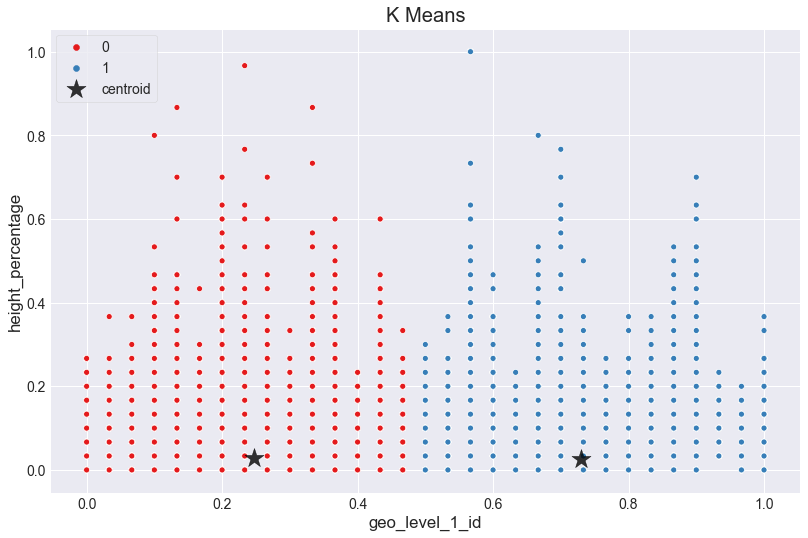

In [42]:
#Scatter plot between any two attibute kmean =2
sns.set_style('darkgrid')
plt.figure(figsize=(12,8))
plt.title('K Means')
sns.scatterplot(x='geo_level_1_id',y='height_percentage',data=x_data,hue=model.labels_,palette='Set1')
#Define the centers of the clusters    
centers = model.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=400, alpha=0.8,marker='*',label='centroid')
plt.legend(loc=2)

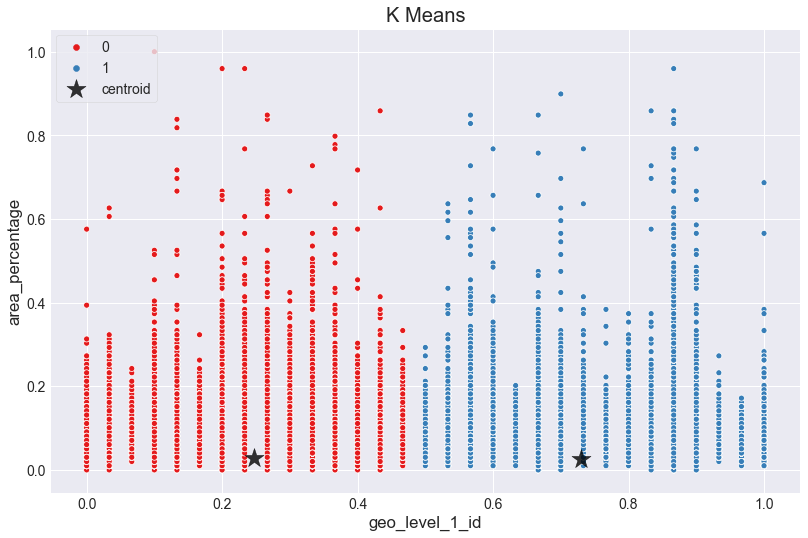

In [43]:
#Scatter plot between any two attibute kmean =2
sns.set_style('darkgrid')
plt.figure(figsize=(12,8))
plt.title('K Means')
sns.scatterplot(x='geo_level_1_id',y='area_percentage',data=x_data,hue=model.labels_,palette='Set1')
#Define the centers of the clusters    
centers = model.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=400, alpha=0.8,marker='*',label='centroid')
plt.legend(loc=2)

In [45]:
# Using k=3 for number of cluster
model = KMeans(n_clusters=3)
model.fit(x_data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [46]:
centroids = model.cluster_centers_
print(centroids)

[[0.24440648 0.02747806 0.06827726 0.11718174]
 [0.87609657 0.0327814  0.08133307 0.11149928]
 [0.62774632 0.02111923 0.06928111 0.11108058]]


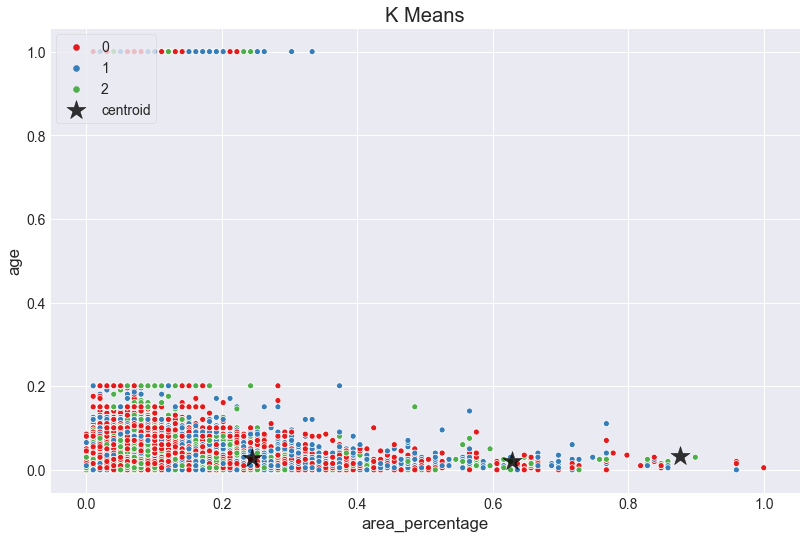

In [47]:
#Scatter plot between any two attibute kmean =2
sns.set_style('darkgrid')
plt.figure(figsize=(12,8))
plt.title('K Means')
sns.scatterplot(x='area_percentage',y='age',data=x_data,hue=model.labels_,palette='Set1')
#Define the centers of the clusters    
centers = model.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=400, alpha=0.8,marker='*',label='centroid')
plt.legend(loc=2)

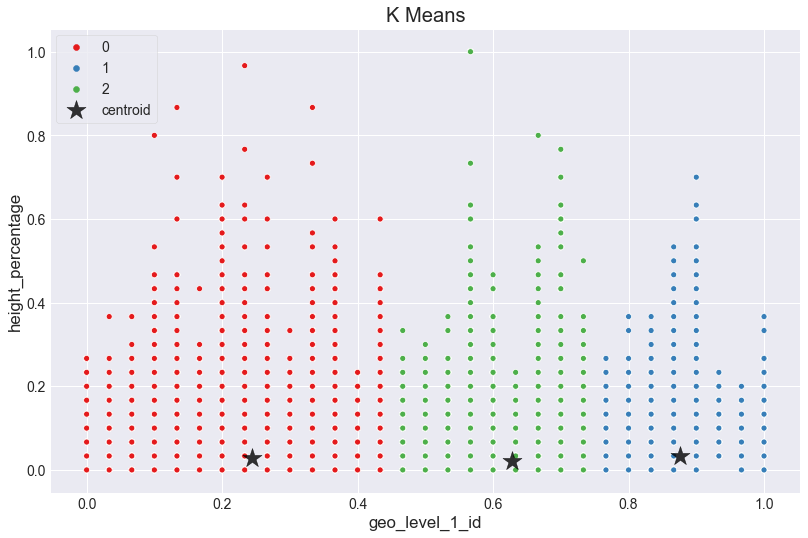

In [48]:
#Scatter plot between any two attibute kmean =2
sns.set_style('darkgrid')
plt.figure(figsize=(12,8))
plt.title('K Means')
sns.scatterplot(x='geo_level_1_id',y='height_percentage',data=x_data,hue=model.labels_,palette='Set1')
#Define the centers of the clusters    
centers = model.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=400, alpha=0.8,marker='*',label='centroid')
plt.legend(loc=2)

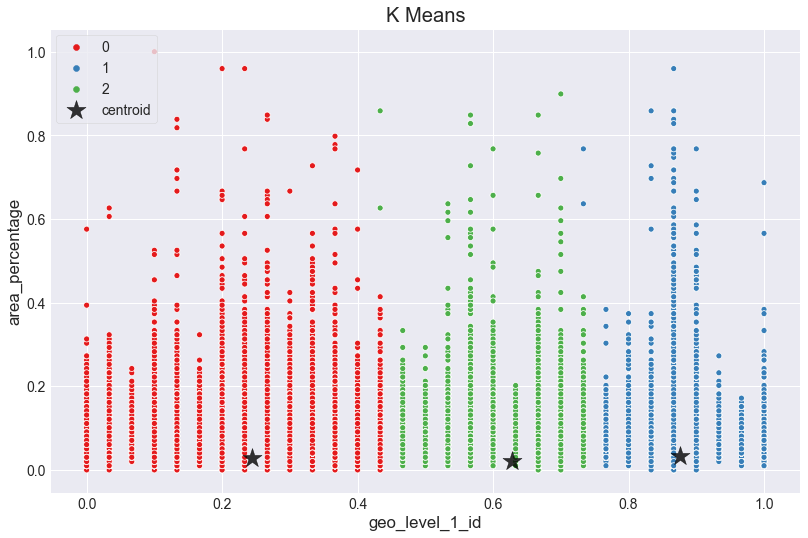

In [49]:
#Scatter plot between any two attibute kmean =2
sns.set_style('darkgrid')
plt.figure(figsize=(12,8))
plt.title('K Means')
sns.scatterplot(x='geo_level_1_id',y='area_percentage',data=x_data,hue=model.labels_,palette='Set1')
#Define the centers of the clusters    
centers = model.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=400, alpha=0.8,marker='*',label='centroid')
plt.legend(loc=2)

In [50]:
# Using k=5 for number of cluster
model = KMeans(n_clusters=5)
model.fit(x_data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [51]:
center = model.cluster_centers_
print(center)

[[0.87637588 0.02288443 0.08135049 0.11133802]
 [0.33736737 0.0213685  0.06519031 0.11118392]
 [0.63172255 0.01837548 0.06917565 0.11125979]
 [0.16634905 0.02350153 0.07114721 0.12222399]
 [0.492494   1.         0.07280721 0.12064748]]


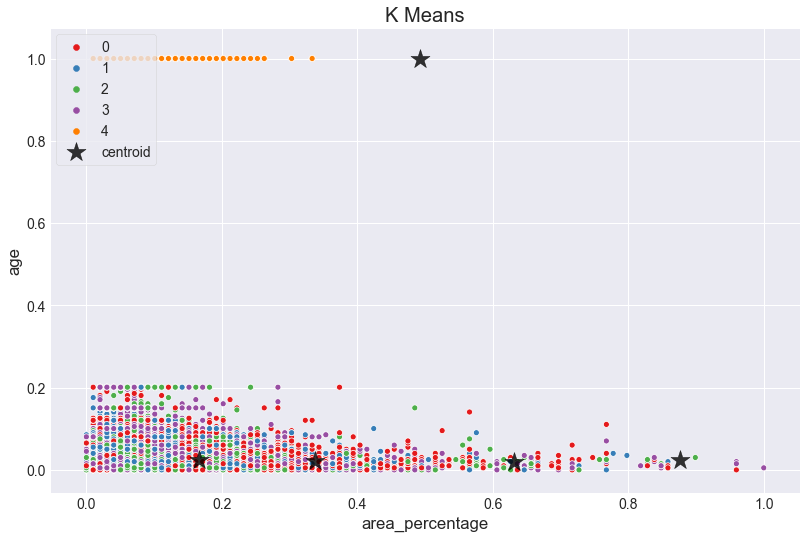

In [52]:
#Scatter plot between any two attibute kmean =2
sns.set_style('darkgrid')
plt.figure(figsize=(12,8))
plt.title('K Means')
sns.scatterplot(x='area_percentage',y='age',data=x_data,hue=model.labels_,palette='Set1')
#Define the centers of the clusters    
centers = model.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=400, alpha=0.8,marker='*',label='centroid')
plt.legend(loc=2)

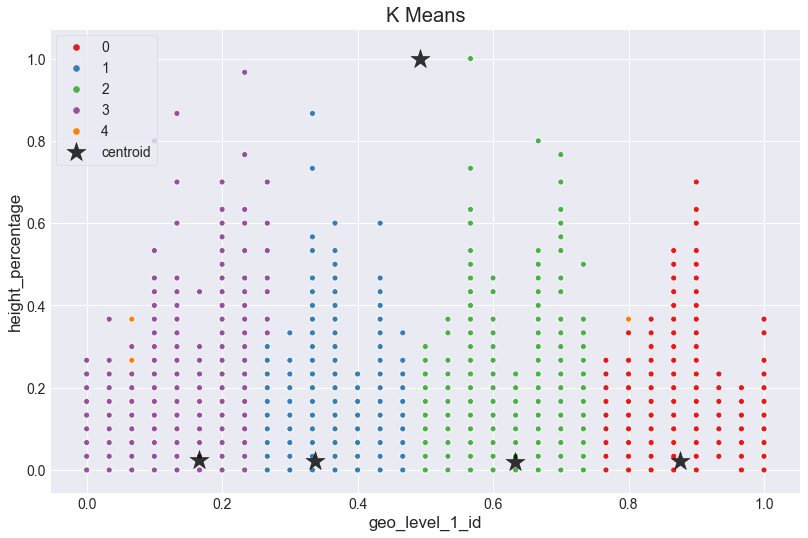

In [53]:
#Scatter plot between any two attibute kmean =2
sns.set_style('darkgrid')
plt.figure(figsize=(12,8))
plt.title('K Means')
sns.scatterplot(x='geo_level_1_id',y='height_percentage',data=x_data,hue=model.labels_,palette='Set1')
#Define the centers of the clusters    
centers = model.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=400, alpha=0.8,marker='*',label='centroid')
plt.legend(loc=2)

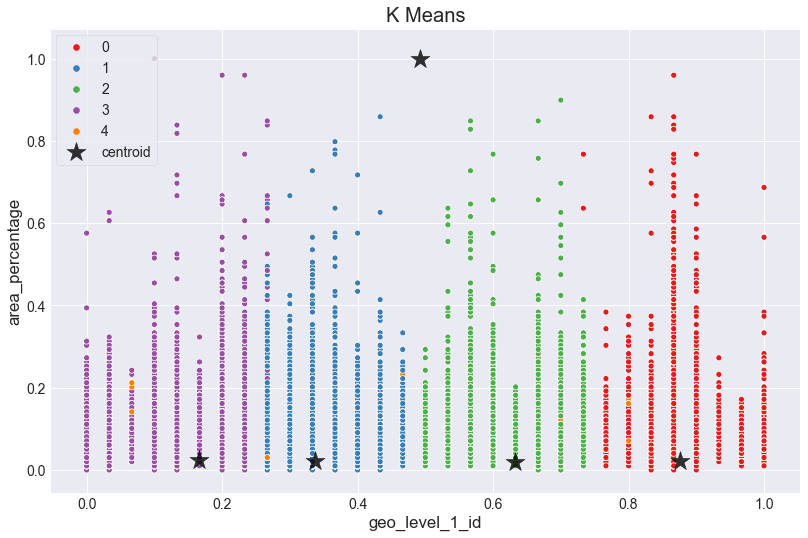

In [54]:
#Scatter plot between any two attibute kmean =2
sns.set_style('darkgrid')
plt.figure(figsize=(12,8))
plt.title('K Means')
sns.scatterplot(x='geo_level_1_id',y='area_percentage',data=x_data,hue=model.labels_,palette='Set1')
#Define the centers of the clusters    
centers = model.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=400, alpha=0.8,marker='*',label='centroid')
plt.legend(loc=2)

In [56]:
DB = DBSCAN(eps=0.5,min_samples=15)
c_data = x_data.copy()
DB.fit(x_data[['geo_level_1_id','area_percentage']])
c_data['Cluster'] = DB.labels_

fig = ex.scatter(c_data,x='Longitude',y='Depth',color='Cluster',height=900)
fig.show()

MemoryError: 

In [57]:
DB = DBSCAN(eps=0.5,min_samples=15)
c_data = x_data.copy()
DB.fit(x_data[['age','area_percentage']])
c_data['Cluster'] = DB.labels_

fig = ex.scatter(c_data,x='Longitude',y='Depth',color='Cluster',height=900)
fig.show()

NameError: name 'database' is not defined

In [58]:
train_values

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,802906,6,487,12198,2,30,6,5,0,0,...,0,0,0,0,0,0,0,0,0,0
1,28830,8,900,2812,2,10,8,7,1,0,...,0,0,0,0,0,0,0,0,0,0
2,94947,21,363,8973,2,10,5,5,0,0,...,0,0,0,0,0,0,0,0,0,0
3,590882,22,418,10694,2,10,6,5,0,0,...,0,0,0,0,0,0,0,0,0,0
4,201944,11,131,1488,3,30,8,9,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260596,688636,25,1335,1621,1,55,6,3,2,0,...,0,0,0,0,0,0,0,0,0,0
260597,669485,17,715,2060,2,0,6,5,0,0,...,0,0,0,0,0,0,0,0,0,0
260598,602512,17,51,8163,3,55,6,7,0,0,...,0,0,0,0,0,0,0,0,0,0
260599,151409,26,39,1851,2,10,14,6,0,0,...,0,0,0,0,0,0,0,0,0,0


In [59]:
y_data = train_values [['geo_level_1_id','age','area_percentage','height_percentage']]

In [60]:
# Scaleing data to same standard scale with mean '0' and std '1'
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data = y_data.copy()
data[data.columns] = scaler.fit_transform(data)

In [61]:
data

,geo_level_1_id,age,area_percentage,height_percentage
0,-0.983414,0.047100,-0.459460,-0.226419
1,-0.734459,-0.224765,-0.004110,0.816109
2,0.883744,-0.224765,-0.687135,-0.226419
3,1.008221,-0.224765,-0.459460,-0.226419
4,-0.361028,0.047100,-0.004110,1.858636
...,...,...,...,...
260596,1.381653,0.386932,-0.459460,-1.268946
260597,0.385835,-0.360698,-0.459460,-0.226419
260598,0.385835,0.386932,-0.459460,0.816109
260599,1.506130,-0.224765,1.361941,0.294845


In [62]:
# Loading Clustering model
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN

In [63]:
# Using k=2 for number of cluster
model = KMeans(n_clusters=2)
model.fit(data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [64]:
#Check centroids of model
centroids = model.cluster_centers_
print(centroids)

[[-0.80612618  0.01648771 -0.07054337  0.05099766]
 [ 0.99158804 -0.02028096  0.08677297 -0.06273046]]


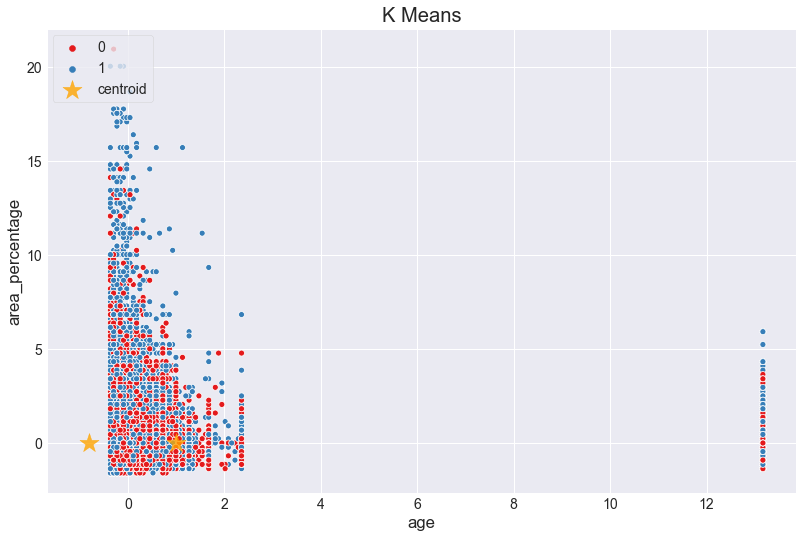

In [65]:
#Scatter plot between any two attibute
sns.set_style('darkgrid')
plt.figure(figsize=(12,8))
plt.title('K Means')
sns.scatterplot(x='age',y='area_percentage',data=data,hue=model.labels_,palette='Set1')
#Define the centers of the clusters    
centers = model.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='orange', s=400, alpha=0.8,marker='*',label='centroid')
plt.legend(loc=2)

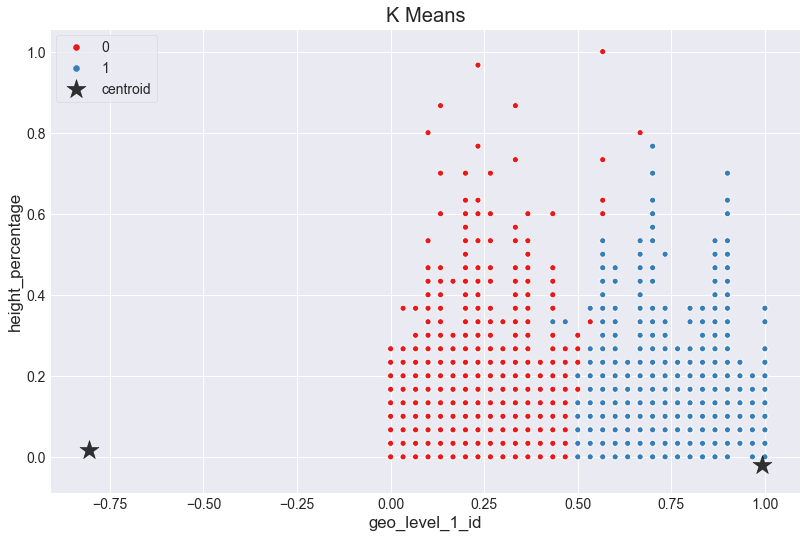

In [66]:
#Scatter plot between any two attibute kmean =2
sns.set_style('darkgrid')
plt.figure(figsize=(12,8))
plt.title('K Means')
sns.scatterplot(x='geo_level_1_id',y='height_percentage',data=x_data,hue=model.labels_,palette='Set1')
#Define the centers of the clusters    
centers = model.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=400, alpha=0.8,marker='*',label='centroid')
plt.legend(loc=2)

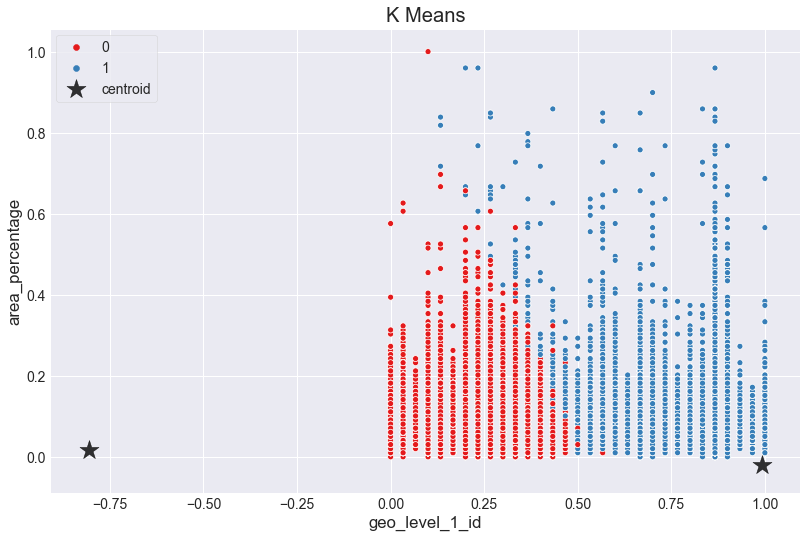

In [67]:
#Scatter plot between any two attibute kmean =2
sns.set_style('darkgrid')
plt.figure(figsize=(12,8))
plt.title('K Means')
sns.scatterplot(x='geo_level_1_id',y='area_percentage',data=x_data,hue=model.labels_,palette='Set1')
#Define the centers of the clusters    
centers = model.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=400, alpha=0.8,marker='*',label='centroid')
plt.legend(loc=2)

In [68]:
# Using k=3 for number of cluster
model = KMeans(n_clusters=3)
model.fit(data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

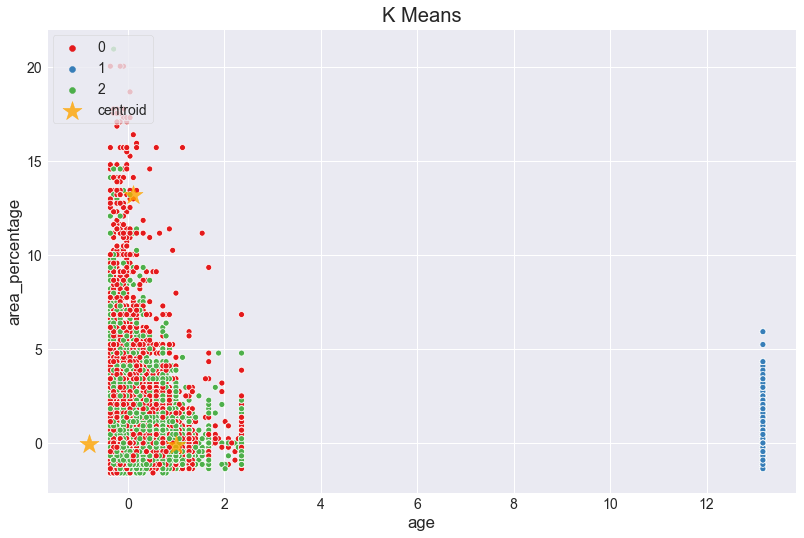

In [69]:
#Scatter plot between any two attibute
sns.set_style('darkgrid')
plt.figure(figsize=(12,8))
plt.title('K Means')
sns.scatterplot(x='age',y='area_percentage',data=data,hue=model.labels_,palette='Set1')
#Define the centers of the clusters    
centers = model.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='orange', s=400, alpha=0.8,marker='*',label='centroid')
plt.legend(loc=2)

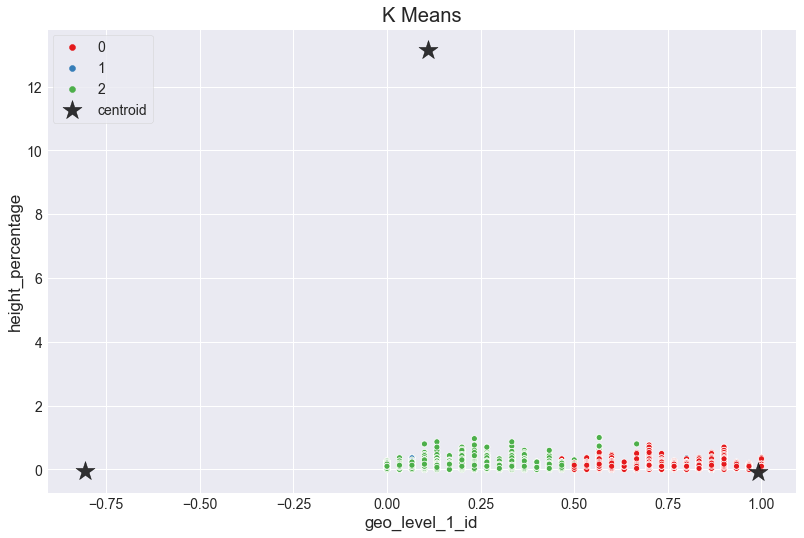

In [70]:
#Scatter plot between any two attibute kmean =2
sns.set_style('darkgrid')
plt.figure(figsize=(12,8))
plt.title('K Means')
sns.scatterplot(x='geo_level_1_id',y='height_percentage',data=x_data,hue=model.labels_,palette='Set1')
#Define the centers of the clusters    
centers = model.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=400, alpha=0.8,marker='*',label='centroid')
plt.legend(loc=2)

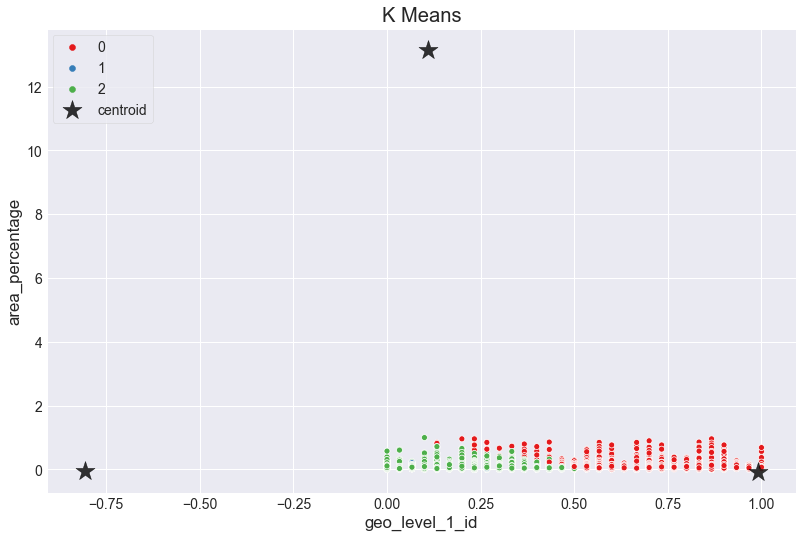

In [71]:
#Scatter plot between any two attibute kmean =2
sns.set_style('darkgrid')
plt.figure(figsize=(12,8))
plt.title('K Means')
sns.scatterplot(x='geo_level_1_id',y='area_percentage',data=x_data,hue=model.labels_,palette='Set1')
#Define the centers of the clusters    
centers = model.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=400, alpha=0.8,marker='*',label='centroid')
plt.legend(loc=2)

In [73]:
new_values = pd.read_csv('new_values.csv')

In [74]:
new_values.head(10)

,damage_grade,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,3,6,487,12198,2,30,6,5,t,r,...,0,0,0,0,0,0,0,0,0,0
1,2,8,900,2812,2,10,8,7,o,r,...,0,0,0,0,0,0,0,0,0,0
2,3,21,363,8973,2,10,5,5,t,r,...,0,0,0,0,0,0,0,0,0,0
3,2,22,418,10694,2,10,6,5,t,r,...,0,0,0,0,0,0,0,0,0,0
4,3,11,131,1488,3,30,8,9,t,r,...,0,0,0,0,0,0,0,0,0,0
5,2,8,558,6089,2,10,9,5,t,r,...,1,0,0,0,0,0,0,0,0,0
6,3,9,475,12066,2,25,3,4,n,r,...,0,0,0,0,0,0,0,0,0,0
7,1,20,323,12236,2,0,8,6,t,w,...,0,0,0,0,0,0,0,0,0,0
8,2,0,757,7219,2,15,8,6,t,r,...,0,0,0,0,0,0,0,0,0,0
9,1,26,886,994,1,0,13,4,t,i,...,0,0,0,0,0,0,0,0,0,0


In [75]:
z_data = new_values [['damage_grade','geo_level_1_id','age','area_percentage','height_percentage']]

In [76]:
# Scaleing data to same standard scale with mean '0' and std '1'
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data = z_data.copy()
data[data.columns] = scaler.fit_transform(data)

In [77]:
z_data

,damage_grade,geo_level_1_id,age,area_percentage,height_percentage
0,3,6,30,6,5
1,2,8,10,8,7
2,3,21,10,5,5
3,2,22,10,6,5
4,3,11,30,8,9
...,...,...,...,...,...
260596,2,25,55,6,3
260597,3,17,0,6,5
260598,3,17,55,6,7
260599,2,26,10,14,6


In [78]:
# Scaleing data to same standard scale with mean '0' and std '1'
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data = z_data.copy()
data[data.columns] = scaler.fit_transform(data)

In [79]:
data

,damage_grade,geo_level_1_id,age,area_percentage,height_percentage
0,1.245035,-0.983414,0.047100,-0.459460,-0.226419
1,-0.389453,-0.734459,-0.224765,-0.004110,0.816109
2,1.245035,0.883744,-0.224765,-0.687135,-0.226419
3,-0.389453,1.008221,-0.224765,-0.459460,-0.226419
4,1.245035,-0.361028,0.047100,-0.004110,1.858636
...,...,...,...,...,...
260596,-0.389453,1.381653,0.386932,-0.459460,-1.268946
260597,1.245035,0.385835,-0.360698,-0.459460,-0.226419
260598,1.245035,0.385835,0.386932,-0.459460,0.816109
260599,-0.389453,1.506130,-0.224765,1.361941,0.294845


In [80]:
# Using k=2 for number of cluster
model = KMeans(n_clusters=2)
model.fit(data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [81]:
#Check centroids of model
centroids = model.cluster_centers_
print(centroids)

[[-0.00352836  0.99133041 -0.01992153  0.0901778  -0.0619691 ]
 [ 0.00286848 -0.80592923  0.01619575 -0.07331252  0.05037948]]


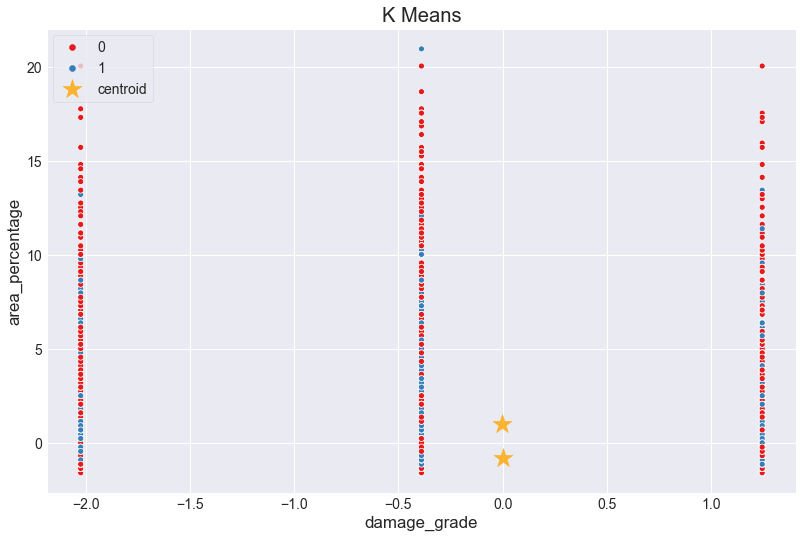

In [82]:
#Scatter plot between any two attibute
sns.set_style('darkgrid')
plt.figure(figsize=(12,8))
plt.title('K Means')
sns.scatterplot(x='damage_grade',y='area_percentage',data=data,hue=model.labels_,palette='Set1')
#Define the centers of the clusters    
centers = model.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='orange', s=400, alpha=0.8,marker='*',label='centroid')
plt.legend(loc=2)

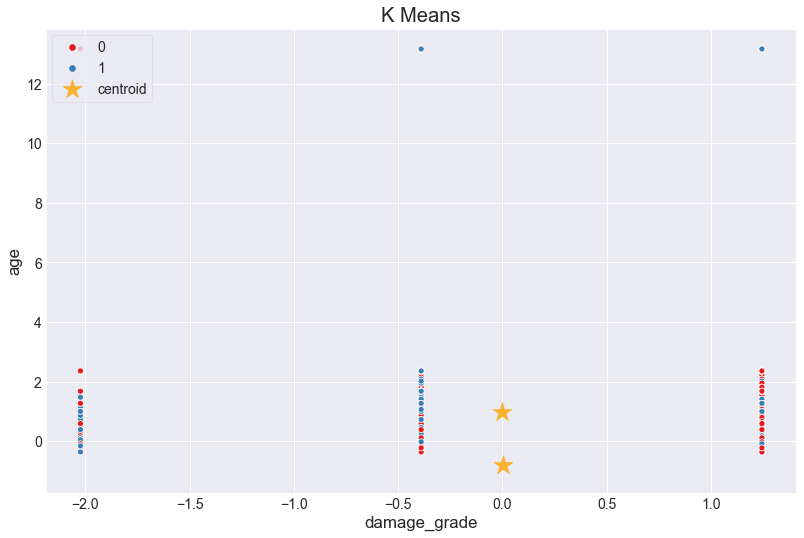

In [83]:
#Scatter plot between any two attibute
sns.set_style('darkgrid')
plt.figure(figsize=(12,8))
plt.title('K Means')
sns.scatterplot(x='damage_grade',y='age',data=data,hue=model.labels_,palette='Set1')
#Define the centers of the clusters    
centers = model.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='orange', s=400, alpha=0.8,marker='*',label='centroid')
plt.legend(loc=2)

In [85]:
x_data = new_values [['damage_grade','geo_level_1_id','age','area_percentage','height_percentage']]

In [86]:
x_data = x_data.apply(lambda x: (x - x.min(axis=0)) / (x.max(axis=0) - x.min(axis=0)))

In [87]:
x_data

,damage_grade,geo_level_1_id,age,area_percentage,height_percentage
0,1.0,0.200000,0.030151,0.050505,0.100000
1,0.5,0.266667,0.010050,0.070707,0.166667
2,1.0,0.700000,0.010050,0.040404,0.100000
3,0.5,0.733333,0.010050,0.050505,0.100000
4,1.0,0.366667,0.030151,0.070707,0.233333
...,...,...,...,...,...
260596,0.5,0.833333,0.055276,0.050505,0.033333
260597,1.0,0.566667,0.000000,0.050505,0.100000
260598,1.0,0.566667,0.055276,0.050505,0.166667
260599,0.5,0.866667,0.010050,0.131313,0.133333


In [89]:
# Using k=2 for number of cluster
model = KMeans(n_clusters=2)
model.fit(data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [90]:
#Check centroids of model
centroids = model.cluster_centers_
print(centroids)

[[ 7.64232526e-04 -5.83706318e-04 -7.05942543e-02 -2.31802211e-04
  -5.17284883e-04]
 [-1.42516171e-01  1.08851150e-01  1.31646095e+01  4.32271101e-02
   9.64646992e-02]]


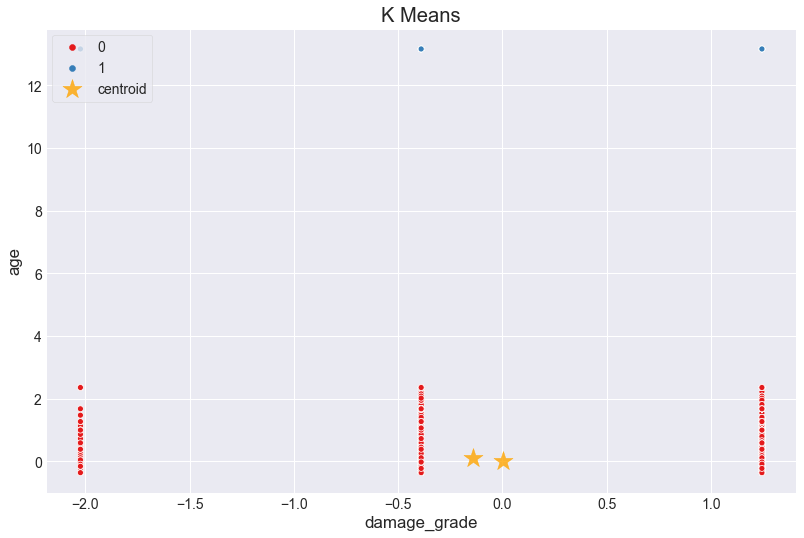

In [91]:
#Scatter plot between any two attibute
sns.set_style('darkgrid')
plt.figure(figsize=(12,8))
plt.title('K Means')
sns.scatterplot(x='damage_grade',y='age',data=data,hue=model.labels_,palette='Set1')
#Define the centers of the clusters    
centers = model.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='orange', s=400, alpha=0.8,marker='*',label='centroid')
plt.legend(loc=2)

In [95]:
DB = DBSCAN(eps=0.5,min_samples=15)
c_data = y_data.copy()
DB.fit(train_values[['geo_level_1_id','area_percentage']])
c_data['Cluster'] = DB.labels_

fig = x.scatter(c_data,x='Longitude',y='Depth',color='Cluster',height=900)
fig.show()

NameError: name 'x' is not defined